# Exploratory Data Analysis on loan dataset

Import libraries needed for analysis

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Load data

In [106]:
df = pd.read_csv("loan.csv")
dict = pd.read_excel('Data_Dictionary.xlsx')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.



In [107]:
df.head().T

,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
member_id,1296599,1314167,1313524,1277178,1311748
loan_amnt,5000,2500,2400,10000,3000
funded_amnt,5000,2500,2400,10000,3000
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0
...,...,...,...,...,...
tax_liens,0.0,0.0,0.0,0.0,0.0
tot_hi_cred_lim,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,NaN,NaN,NaN,NaN,NaN
total_bc_limit,NaN,NaN,NaN,NaN,NaN


In [108]:
dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


## Data cleaning

### Remove columns with only 1 unique values

Columns with only one unique value provide no value to our analysis. Because all of the items have the same value, there is no distinction between them.

In [109]:
df.drop(columns = df.nunique().loc[lambda x: x == 1].index, inplace=True)

In [110]:
# Shape of the Data
df.shape

(39717, 102)

### Handle na in columns

#### Remove columns where all values are na

In [111]:
# Search for columns with all na values
df.drop(columns = df.isna().sum()[lambda x: x == len(df)].index, inplace=True)
df.shape

(39717, 48)

Look at the remaining columns

#### Remove columns with high percentage of na values

In [112]:
df.isna().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [113]:
df.drop(columns=['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


### Look at columns along with description

In [114]:
for column in df.columns:
    x = dict[dict['LoanStatNew']==column]
    print(column, ":\t\t", list(x['Description']))
    print("-"*100)

id :		 ['A unique LC assigned ID for the loan listing.']
----------------------------------------------------------------------------------------------------
member_id :		 ['A unique LC assigned Id for the borrower member.']
----------------------------------------------------------------------------------------------------
loan_amnt :		 ['The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.']
----------------------------------------------------------------------------------------------------
funded_amnt :		 ['The total amount committed to that loan at that point in time.']
----------------------------------------------------------------------------------------------------
funded_amnt_inv :		 ['The total amount committed by investors for that loan at that point in time.']
-------------------------------------------------------------------------------------------------

### Remove customer behaviour variables which are not present at the time of loan application

Variables like 'out prncp,' 'total rec int,' and so on are not available at the time of loan application and are collected after the loan has been disbursed, hence they are invalid for our study.

In [115]:
df.drop(columns=['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 
                 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
                 'out_prncp', 'out_prncp_inv', 'total_pymnt', 
                 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
                 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], 
        inplace=True)

### Remove variables where all values are unique.

In [116]:
df.head().T

,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
member_id,1296599,1314167,1313524,1277178,1311748
loan_amnt,5000,2500,2400,10000,3000
funded_amnt,5000,2500,2400,10000,3000
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0
term,36 months,60 months,36 months,36 months,60 months
int_rate,10.65%,15.27%,15.96%,13.49%,12.69%
installment,162.87,59.83,84.33,339.31,67.79
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5


In [117]:
df.url.value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568534     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=567165     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=785667     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785630     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785626     1
https://lendingclub.com/browse/loanDetail.action?loan_id=87023      1
Name: url, Length: 39717, dtype: int64

In [118]:
df.drop(columns=['id', 'member_id', 'url'], inplace=True)

In [119]:
df.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

### Remove categorical variables with a large number of unique values

In [120]:
df.head().T

,0,1,2,3,4
loan_amnt,5000,2500,2400,10000,3000
funded_amnt,5000,2500,2400,10000,3000
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0
term,36 months,60 months,36 months,36 months,60 months
int_rate,10.65%,15.27%,15.96%,13.49%,12.69%
installment,162.87,59.83,84.33,339.31,67.79
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5
emp_title,NaN,Ryder,NaN,AIR RESOURCES BOARD,University Medical Group
emp_length,10+ years,< 1 year,10+ years,10+ years,1 year


In [121]:
df[['term','grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 
    'verification_status', 'purpose', 'title', 'zip_code', 
    'addr_state']].nunique(axis=0)

term                       2
grade                      7
sub_grade                 35
emp_title              28820
emp_length                11
home_ownership             5
verification_status        3
purpose                   14
title                  19615
zip_code                 823
addr_state                50
dtype: int64

In [122]:
df.drop(columns=['emp_title', 'title', 'zip_code'], inplace=True)

### Remove all entries where the loan is still going on

In [123]:
df = df[df.loan_status != "Current"]

### Handle na rows

In [124]:
df.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

Since, the number of rows with na value is low. We can drop the rows

In [125]:
df.dropna(inplace=True)

In [126]:
df.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

### Drop columns with high correlation

In [127]:
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,pub_rec_bankruptcies
loan_amnt,1.000000,0.981602,0.951946,0.931241,0.270251,0.060617,-0.031758
funded_amnt,0.981602,1.000000,0.971344,0.957326,0.266267,0.060739,-0.032708
funded_amnt_inv,0.951946,0.971344,1.000000,0.923645,0.257337,0.063831,-0.037598
installment,0.931241,0.957326,0.923645,1.000000,0.269250,0.050613,-0.029352
annual_inc,0.270251,0.266267,0.257337,0.269250,1.000000,-0.123396,-0.012378
dti,0.060617,0.060739,0.063831,0.050613,-0.123396,1.000000,0.006733
pub_rec_bankruptcies,-0.031758,-0.032708,-0.037598,-0.029352,-0.012378,0.006733,1.000000


'loan_amnt', 'funded_amnt' and 'funded_amnt_inv' are highly correlated. We have decided to keep the 'loan_amnt' variable. Since, it is the value which is available at the time of loan application

In [128]:
df.drop(columns=['funded_amnt', 'funded_amnt_inv'], inplace=True)

'installment' is also highly correlated with loan amount, therefore we are dropping installment

In [129]:
df.drop(columns=['installment'], inplace=True)

## Process column types

### Remove % from int_rate column and convert it to float

In [130]:
df.int_rate = df.int_rate.apply(lambda x: float(x.replace('%', '')) if type(x) == str else x).astype(float)

In [131]:
df.dtypes

loan_amnt                 int64
term                     object
int_rate                float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

### Add column *annual_inc_k* in place of *annual_inc* to indicate annual income in thousands and standardize the value

In [132]:
df['annual_inc_k'] = df.annual_inc.apply(lambda x: round(x/1000, 0))
df.drop(columns=['annual_inc'], inplace=True)

### Derive components from *issue_d* column

In [133]:
df['issue_date'] = pd.to_datetime(df.issue_d, format='%b-%y')

In [134]:
df['issue_month'] = pd.DatetimeIndex(df['issue_date']).month
df['issue_year'] = pd.DatetimeIndex(df['issue_date']).year
df.drop(columns=['issue_date', 'issue_d'], inplace=True)

### Add column *default* to indicate whether the borrower defaulted or not

In [135]:
df['default'] = df.loan_status.apply(lambda x: 1 if x == 'Charged Off' else 0)

In [136]:
df.head().T

,0,1,2,3,5
loan_amnt,5000,2500,2400,10000,5000
term,36 months,60 months,36 months,36 months,36 months
int_rate,10.65,15.27,15.96,13.49,7.9
grade,B,C,C,C,A
sub_grade,B2,C4,C5,C1,A4
emp_length,10+ years,< 1 year,10+ years,10+ years,3 years
home_ownership,RENT,RENT,RENT,RENT,RENT
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified
loan_status,Fully Paid,Charged Off,Fully Paid,Fully Paid,Fully Paid
purpose,credit_card,car,small_business,other,wedding


## Univariate Analysis

### Exploration

In [137]:
df.head().T

,0,1,2,3,5
loan_amnt,5000,2500,2400,10000,5000
term,36 months,60 months,36 months,36 months,36 months
int_rate,10.65,15.27,15.96,13.49,7.9
grade,B,C,C,C,A
sub_grade,B2,C4,C5,C1,A4
emp_length,10+ years,< 1 year,10+ years,10+ years,3 years
home_ownership,RENT,RENT,RENT,RENT,RENT
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified
loan_status,Fully Paid,Charged Off,Fully Paid,Fully Paid,Fully Paid
purpose,credit_card,car,small_business,other,wedding


In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,36847.0,11141.327652,7369.988994,500.00,5500.00,10000.00,15000.00,35000.00
int_rate,36847.0,11.988346,3.702091,5.42,8.94,11.86,14.52,24.40
dti,36847.0,13.330449,6.651565,0.00,8.21,13.42,18.59,29.99
pub_rec_bankruptcies,36847.0,0.041794,0.200799,0.00,0.00,0.00,0.00,2.00
annual_inc_k,36847.0,69.401254,64.029146,4.00,41.00,60.00,83.00,6000.00
issue_month,36847.0,7.156376,3.380512,1.00,4.00,7.00,10.00,12.00
issue_year,36847.0,2010.348549,0.816240,2007.00,2010.00,2011.00,2011.00,2011.00
default,36847.0,0.143322,0.350406,0.00,0.00,0.00,0.00,1.00


In [139]:
df.pivot_table(index=df.loan_status, aggfunc=np.mean)

,annual_inc_k,default,dti,int_rate,issue_month,issue_year,loan_amnt,pub_rec_bankruptcies
loan_status,,,,,,,,
Charged Off,63.160765,1,14.022721,13.932233,7.376444,2010.408445,12236.347283,0.064192
Fully Paid,70.445289,0,13.214632,11.663133,7.119559,2010.338529,10958.130584,0.038047


In [140]:
df.pivot_table(index=df.loan_status, aggfunc=np.median)

,annual_inc_k,default,dti,int_rate,issue_month,issue_year,loan_amnt,pub_rec_bankruptcies
loan_status,,,,,,,,
Charged Off,54.0,1,14.33,13.79,8,2011,10000,0.0
Fully Paid,60.0,0,13.26,11.49,7,2011,9600,0.0


In [141]:
df[df.loan_status == 'Charged Off'].describe()

,loan_amnt,int_rate,dti,pub_rec_bankruptcies,annual_inc_k,issue_month,issue_year,default
count,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.0
mean,12236.347283,13.932233,14.022721,0.064192,63.160765,7.376444,2010.408445,1.0
std,8103.456528,3.652394,6.559160,0.246659,47.683844,3.324656,0.816958,0.0
min,1000.000000,5.420000,0.000000,0.000000,4.000000,1.000000,2007.000000,1.0
25%,6000.000000,11.490000,9.130000,0.000000,38.000000,5.000000,2010.000000,1.0
50%,10000.000000,13.790000,14.330000,0.000000,54.000000,8.000000,2011.000000,1.0
75%,16950.000000,16.450000,19.280000,0.000000,75.000000,10.000000,2011.000000,1.0
max,35000.000000,24.400000,29.850000,2.000000,1250.000000,12.000000,2011.000000,1.0


In [142]:
df[df.loan_status == 'Fully Paid'].describe()

,loan_amnt,int_rate,dti,pub_rec_bankruptcies,annual_inc_k,issue_month,issue_year,default
count,31566.000000,31566.000000,31566.000000,31566.000000,31566.000000,31566.000000,31566.000000,31566.0
mean,10958.130584,11.663133,13.214632,0.038047,70.445289,7.119559,2010.338529,0.0
std,7223.977380,3.609582,6.659979,0.191810,66.315119,3.388423,0.815704,0.0
min,500.000000,5.420000,0.000000,0.000000,4.000000,1.000000,2007.000000,0.0
25%,5400.000000,8.590000,8.070000,0.000000,42.000000,4.000000,2010.000000,0.0
50%,9600.000000,11.490000,13.260000,0.000000,60.000000,7.000000,2011.000000,0.0
75%,15000.000000,14.090000,18.450000,0.000000,85.000000,10.000000,2011.000000,0.0
max,35000.000000,24.110000,29.990000,2.000000,6000.000000,12.000000,2011.000000,0.0


#### Observations

1. Mean, median, 25% and 75% of **annual income** are all lower for charged off loans.
2. Mean, median, 25% and 75% of **dti** (debt to income ratio) are all higher for charged off loans.
3. Interest rate is higher for charged off loans
4. Loan amount is higher for charged off loans



### Numerical Variables


In [143]:
df.corr()

,loan_amnt,int_rate,dti,pub_rec_bankruptcies,annual_inc_k,issue_month,issue_year,default
loan_amnt,1.000000,0.298346,0.060617,-0.031758,0.270266,0.053366,0.116391,0.060773
int_rate,0.298346,1.000000,0.106760,0.082988,0.047095,0.022973,0.025588,0.214772
dti,0.060617,0.106760,1.000000,0.006733,-0.123395,0.008278,0.081304,0.042570
pub_rec_bankruptcies,-0.031758,0.082988,0.006733,1.000000,-0.012387,-0.022183,-0.002942,0.045625
annual_inc_k,0.270266,0.047095,-0.123395,-0.012387,1.000000,0.009341,0.014748,-0.039865
issue_month,0.053366,0.022973,0.008278,-0.022183,0.009341,1.000000,-0.069405,0.026627
issue_year,0.116391,0.025588,0.081304,-0.002942,0.014748,-0.069405,1.000000,0.030015
default,0.060773,0.214772,0.042570,0.045625,-0.039865,0.026627,0.030015,1.000000


We observe, int_rate has a decent correlation with default

In [144]:
df.head().T

,0,1,2,3,5
loan_amnt,5000,2500,2400,10000,5000
term,36 months,60 months,36 months,36 months,36 months
int_rate,10.65,15.27,15.96,13.49,7.9
grade,B,C,C,C,A
sub_grade,B2,C4,C5,C1,A4
emp_length,10+ years,< 1 year,10+ years,10+ years,3 years
home_ownership,RENT,RENT,RENT,RENT,RENT
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified
loan_status,Fully Paid,Charged Off,Fully Paid,Fully Paid,Fully Paid
purpose,credit_card,car,small_business,other,wedding


In [145]:
def plotDensityAndBox(df, column_name, quantile_perc=0.97):
    # Remove ouliers
    quantile = df[df[column_name] <= df.quantile(quantile_perc)[column_name]]

    # Segregate charged off and fully paid entries
    quantile_charged_off = quantile.loc[quantile.loan_status == 'Charged Off']
    quantile_fully_paid = quantile.loc[quantile.loan_status == 'Fully Paid']
    
    # Set figure size and set the title of the fig as the column name
    fig = plt.figure(figsize=(20,10))
    fig.suptitle(column_name.upper().replace('_', ' '), fontsize=16)
    
    # Plot a density plot
    plt.subplot(1,2,1)
    sns.kdeplot(quantile_charged_off[column_name])
    sns.kdeplot(quantile_fully_paid[column_name])
    plt.legend(['Charged Off', 'Fully Paid'])
    
    # Plot a box plot
    plt.subplot(1,2,2)
    plt.boxplot([quantile_charged_off[column_name], 
                 quantile_fully_paid[column_name]], 
                labels=['Charged Off', 'Fully Paid'])

    plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



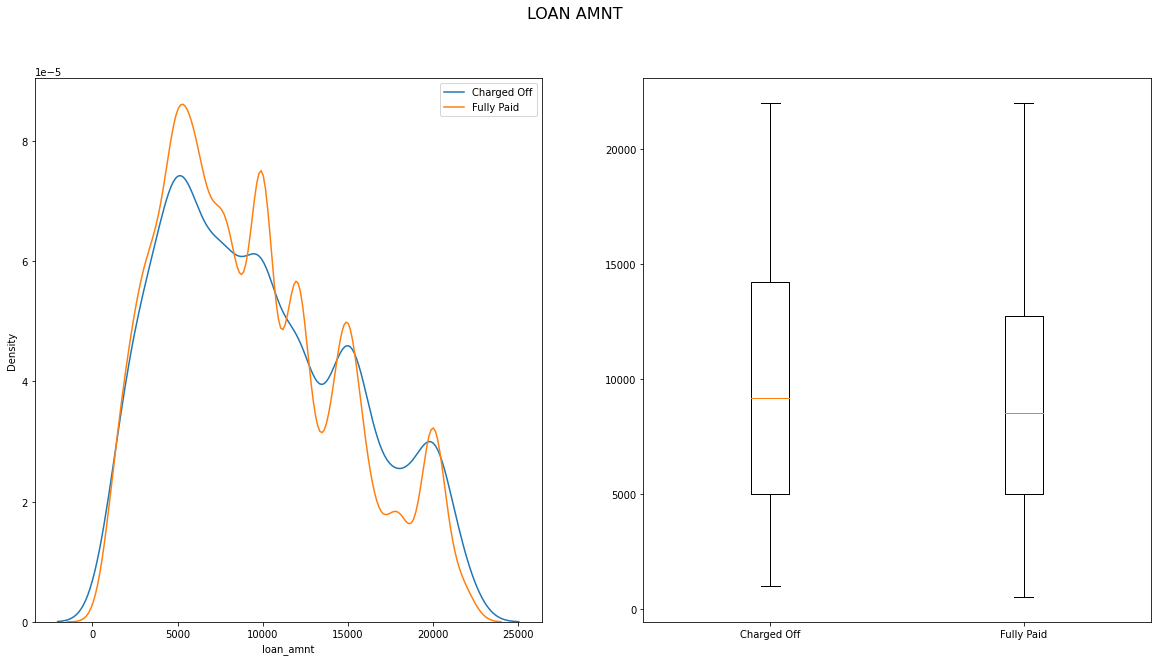

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



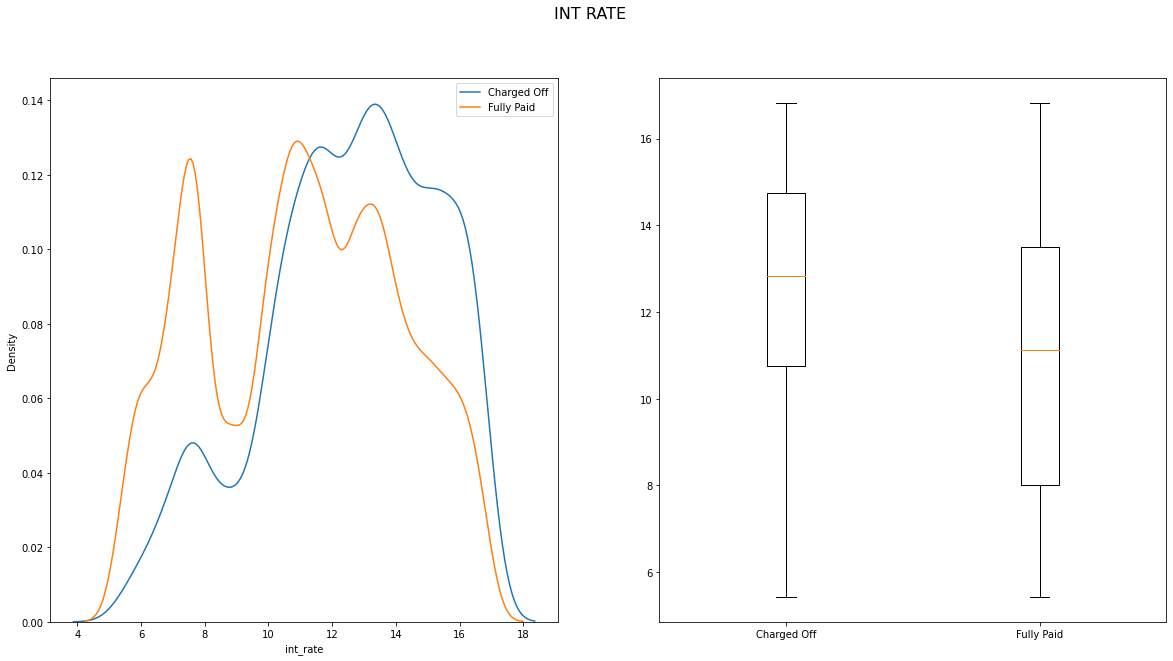

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



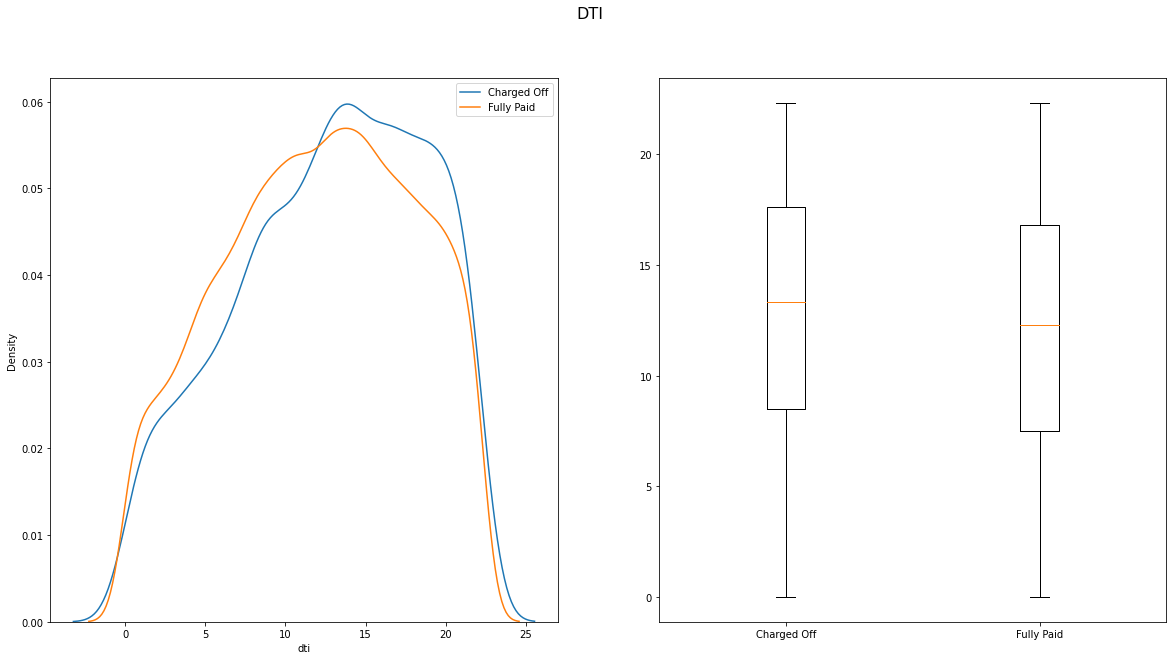

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



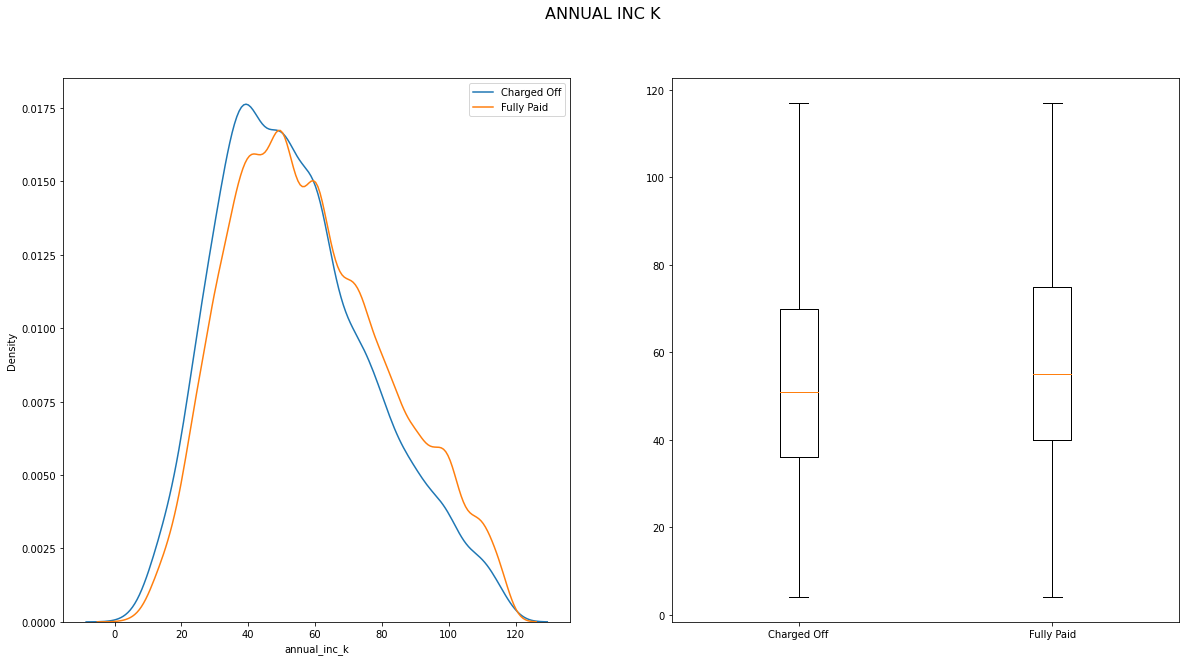

In [ ]:
%matplotlib inline
numerical_columns = ['loan_amnt', 'int_rate', 'dti', 
                     'annual_inc_k', 'issue_month', 'issue_year']
for column in numerical_columns:
    plotDensityAndBox(df, column, 0.90)

### Categorical Variables

In [ ]:
df.head().T

In [ ]:
charged_off = df.loc[df.loan_status == 'Charged Off']
fully_paid_sampled = df.loc[df.loan_status == 'Fully Paid'].sample(len(charged_off))
fully_paid = df.loc[df.loan_status == 'Fully Paid']

In [ ]:
def density_and_bar_plot(column_name, order=None, figsize=(15, 10)):
  plt.figure(figsize=figsize)

  # Plot a bar plot
  plt.subplot(1,2,1)
  sns.countplot(data=pd.concat([charged_off, fully_paid]), 
                x=column_name, 
                hue='loan_status',
                order=order)
  plt.title('Real Data')
    
    # Plot a bar plot representing density
  plt.subplot(1,2,2)
  sns.countplot(data=pd.concat([charged_off, fully_paid_sampled]), 
                x=column_name, 
                hue='loan_status',
                order=order)
  plt.title('Density Comparison')
  plt.show()

In [ ]:
density_and_bar_plot('term')

In [ ]:
density_and_bar_plot('grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [ ]:
density_and_bar_plot('emp_length', order=['< 1 year', '1 year', '2 years', '3 years', '4 years', 
                     '5 years', '6 years', '7 years', '8 years', '9 years', 
                     '10+ years'], figsize=(20,10))

In [ ]:
density_and_bar_plot('home_ownership')

In [ ]:
density_and_bar_plot('verification_status')

In [ ]:
density_and_bar_plot('issue_month')

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(data=pd.concat([charged_off, fully_paid]), y='purpose', hue='loan_status')
plt.title('Purpose')
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(data=pd.concat([charged_off, fully_paid_sampled]), y='purpose', hue='loan_status')
plt.title('Purpose density comparison')
plt.show()

#### Observation

1. There is an increased chance of default when purpose is small_business
2. There is an decresed chance of default when 

## Bivariate Analysis

In [ ]:
sns.catplot(data=df, x='purpose', y='loan_amnt', hue='loan_status', kind='boxen', height=10, aspect=2.5)

#### Observation

1. Higher loan amount results in higher chance of default, except when purpose is moving, house or renewable energy

In [ ]:
sns.catplot(data=df, x='purpose', y='int_rate', hue='loan_status', kind='boxen', height=10, aspect=2.5)

In [ ]:
sns.catplot(data=df, x='purpose', y='installment', hue='loan_status', kind='boxen', height=10, aspect=2.5)

In [ ]:
sns.catplot(data=df, x='grade', y='int_rate', hue='loan_status', kind='boxen', height=10, aspect=2.5, 
            order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

#### Observation

1. Higher interest rate results in more defaults, even within the same grade

In [ ]:
sns.catplot(data=df, x='term', y='int_rate', hue= 'loan_status', kind='boxen', height=10, aspect=2.5)

In [ ]:
def plotBivariateDensity(df, column_1, column_2, quantile_perc=0.97):
    quantile = df[df[column_1] <= df.quantile(quantile_perc)[column_1]]
    quantile = df[df[column_2] <= df.quantile(quantile_perc)[column_2]]
    
    plt.figure(figsize=(20,10))
    sns.kdeplot(data=quantile, x=column_1, y=column_2, hue='loan_status')
    plt.show()

In [ ]:
plotBivariateDensity(df, 'loan_amnt', 'annual_inc_k')

#### Observations

1. Above annual income of about 90,000 there is a high chance that the loan will be paid off.
2. There is a good chance of loan repayment when the loan amount is higher than 28000.

In [ ]:
fig = px.imshow(df.corr(), width=1000, height=600)
fig.show()

In [ ]:
sns.catplot(data=df, x='grade', y='loan_amnt', 
            hue= 'loan_status', kind='boxen', height=10, aspect=2.5,
            order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [ ]:
plotBivariateDensity(df, 'loan_amnt', 'int_rate')

#### Observation

1. Confirms our observation that higher interest rate results in more defaults

In [ ]:
sns.catplot(data=df, x='term', y='int_rate', 
            hue= 'loan_status', kind='boxen', height=10, aspect=2.5,)

In [ ]:
sns.catplot(data=df, x='purpose', y='issue_month', 
            hue= 'loan_status', kind='boxen', height=10, aspect=2.5,)

#### Observation

We see an interesting plot of how defaults are divided between months of disbursal of loan